In [3]:
import glob
import os
import pathlib

# import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import PIL
import tensorflow as tf
# from keras import Sequential
from tensorflow.keras.layers import (
    Conv2D,
    Dense,
    Dropout,
    Flatten,
    MaxPooling2D,
    experimental,
)

ModuleNotFoundError: No module named 'pandas'

In [1]:
import tensorflow as tf
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available: 1


In [3]:
data_dir_train = pathlib.Path("dataset\\train\\")
data_dir_test = pathlib.Path("dataset\\test\\")

In [4]:
image_train = list(data_dir_train.glob("*\*.jpg"))
print(len(image_train))
image_test = list(data_dir_test.glob("*\*.jpg"))
print(len(image_test))

9376
2344


In [5]:
data_dir_train

WindowsPath('dataset/train')

In [6]:
batch_size = 32
img_height = 180
img_width = 180

In [7]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split=0.2,
    subset="training",
    image_size=(img_height, img_width),
    batch_size=batch_size,
)

Found 9376 files belonging to 8 classes.
Using 7501 files for training.


In [8]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split=0.2,
    subset="validation",
    image_size=(img_height, img_width),
    batch_size=batch_size,
)

Found 9376 files belonging to 8 classes.
Using 1875 files for validation.


In [9]:
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'squamous cell carcinoma', 'vascular lesion']


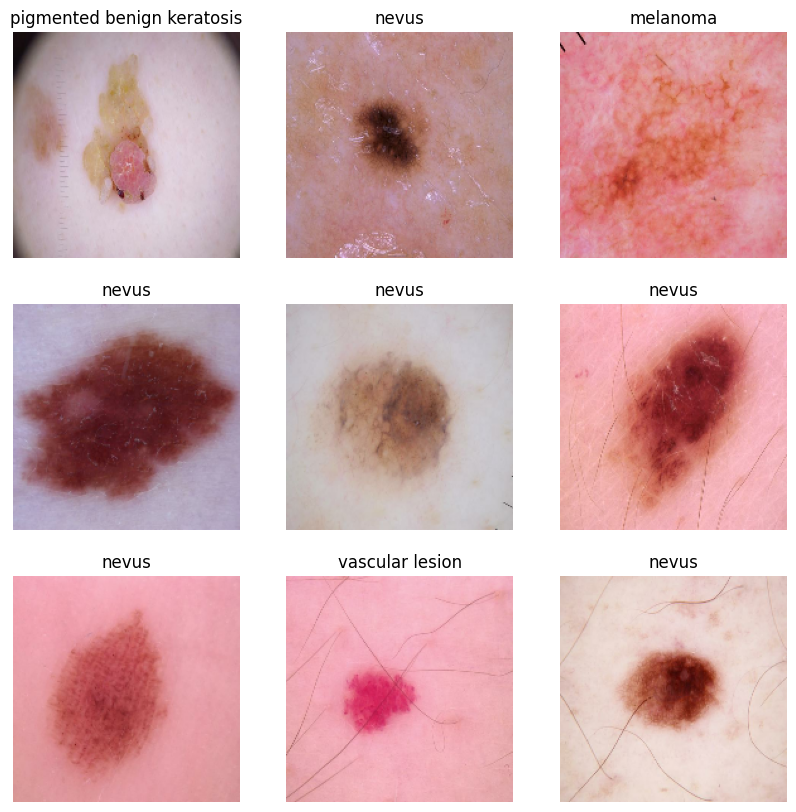

In [10]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [11]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [16]:
num_classes = len(class_names)
# Define the input shape and the number of output classes
input_shape=(img_height, img_width, 3)

In [18]:
input_shape

(180, 180, 3)

In [12]:
import tensorflow as tf

print("TensorFlow Version:", tf.__version__)
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))


TensorFlow Version: 2.10.0
Num GPUs Available: 1


In [19]:
data_augmentation = keras.Sequential(
    [
        experimental.preprocessing.RandomFlip(
            "horizontal", input_shape=(img_height, img_width, 3)
        ),
        experimental.preprocessing.RandomRotation(0.1),
        experimental.preprocessing.RandomZoom(0.1),
    ]
)

In [ ]:
model = Sequential(
    [
        data_augmentation,
        experimental.preprocessing.Rescaling(1.0 / 255),
        Conv2D(16, 3, padding="same", activation="relu"),
        MaxPooling2D(),
        Conv2D(32, 3, padding="same", activation="relu"),
        MaxPooling2D(),
        Conv2D(64, 3, padding="same", activation="relu"),
        MaxPooling2D(),
        Dropout(0.2),
        Flatten(),
        Dense(128, activation="relu"),
        Dense(num_classes),
    ]
)

: 

In [24]:
import tensorflow as tf
from tensorflow.keras import layers, models

batch_size = 32
img_height = 180
img_width = 180
input_shape = (img_height, img_width, 3)

In [25]:
# Load the pretrained EfficientNetB0 model with ImageNet weights
base_model = tf.keras.applications.EfficientNetB0(
    include_top=False,
    weights='imagenet',
    input_shape=input_shape
)

# Freeze the base model's weights so they aren't trained initially
base_model.trainable = False

# Data augmentation
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomContrast(0.2),
])

# Build the new model with the base model
inputs = layers.Input(shape=input_shape)
x = data_augmentation(inputs)
x = tf.keras.applications.efficientnet.preprocess_input(x)  # Use EfficientNet-specific preprocessing
x = base_model(x, training=False)

# Add new classification head
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(num_classes, activation='softmax')(x)

model = models.Model(inputs, outputs)

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

16705208/16705208 [==============================] - 3s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 sequential_6 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 efficientnetb0 (Functional)  (None, 6, 6, 1280)       4049571   
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 256)               327936    
                                                                 
 dropout (Dropout)           (None, 256)               0      

In [ ]:
# model.compile(
#     optimizer="adam",
#     loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#     metrics=["accuracy", "mse"],
# )

: 

In [26]:
epochs = 2
history = model.fit(train_ds, validation_data=val_ds, epochs=epochs)

Epoch 1/2


ValueError: in user code:

    File "c:\Users\ayang\.conda\envs\mirchi\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\ayang\.conda\envs\mirchi\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\ayang\.conda\envs\mirchi\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\ayang\.conda\envs\mirchi\lib\site-packages\keras\engine\training.py", line 994, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "c:\Users\ayang\.conda\envs\mirchi\lib\site-packages\keras\engine\training.py", line 1052, in compute_loss
        return self.compiled_loss(
    File "c:\Users\ayang\.conda\envs\mirchi\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "c:\Users\ayang\.conda\envs\mirchi\lib\site-packages\keras\losses.py", line 152, in __call__
        losses = call_fn(y_true, y_pred)
    File "c:\Users\ayang\.conda\envs\mirchi\lib\site-packages\keras\losses.py", line 272, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "c:\Users\ayang\.conda\envs\mirchi\lib\site-packages\keras\losses.py", line 1990, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "c:\Users\ayang\.conda\envs\mirchi\lib\site-packages\keras\backend.py", line 5529, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 8) are incompatible


In [ ]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label="Training Accuracy")
plt.plot(epochs_range, val_acc, label="Validation Accuracy")
plt.legend(loc="lower right")
plt.title("Training and Validation Accuracy")

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label="Training Loss")
plt.plot(epochs_range, val_loss, label="Validation Loss")
plt.legend(loc="upper right")
plt.title("Training and Validation Loss")
plt.show()

: 

In [20]:
# model accuracy
accuracy = model.evaluate(val_ds)
print(f"Accuracy: {accuracy[1]*100:.2f}%")

 1/59 [..............................] - ETA: 1s - loss: 0.6949 - accuracy: 0.7812

59/59 [==============================] - 1s 8ms/step - loss: 0.8364 - accuracy: 0.7035
Accuracy: 70.35%


In [ ]:
model.save("model_new.h5")

: 